In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve,auc,f1_score
from sklearn import metrics

In [2]:
ExploreDf = pd.DataFrame()
ExploreDf = pd.read_csv('Paper33SupData/features_10week_all.csv')
print(ExploreDf)


     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  2.329154e-05   2.505256e-07     229.987882          5.274546   
1   u01  6.054921e-07   2.877519e-11       2.566260        -11.383360   
2   u02  1.615362e-06   1.920707e-09       6.686956         -6.973576   
3   u03  3.545538e-07   8.135541e-11       0.824013        -11.517559   
4   u04  1.389936e-06   6.292272e-10      27.183983         -3.618104   
5   u05  7.993447e-07   1.376761e-10       5.184300         -4.759810   
6   u07  5.926940e-07   3.656015e-11      26.565523         -1.906466   
7   u08  5.562702e-07   1.972275e-11       4.488032         -7.619410   
8   u09  7.646657e-07   3.040105e-11       9.662998         -4.076226   
9   u10  5.302156e-07   2.703248e-11       2.176755        -12.302372   
10  u12  7.598654e-06   5.797482e-09      51.149978         -0.451367   
11  u13  2.434079e-06   2.907508e-10      11.680799         -7.024697   
12  u14  5.455124e-07   1.866984e-11       5.338019

In [3]:
print(ExploreDf.keys())

Index(['id', 'SpeedMean', 'SpeedVariance', 'TotalDistance', 'LocationVariance',
       'CircadianMovement', 'NumberofClusters', 'Entropy', 'NormalizedEntropy',
       'ContinuousEntropy', 'HomeStay', 'TransitionTime'],
      dtype='object')


In [4]:
PHQ9Df = pd.DataFrame()
PHQ9Df = pd.read_csv('Paper33SupData/phq9_followup.csv')
print(PHQ9Df)

     id  PHQ9
0   u00     3
1   u01     4
2   u02     5
3   u03     4
4   u04     8
5   u05     0
6   u07     8
7   u09     2
8   u10     4
9   u14     3
10  u15     1
11  u16    12
12  u17    18
13  u18    12
14  u19     4
15  u20     8
16  u23    21
17  u24     7
18  u27     7
19  u30     0
20  u31     5
21  u32     2
22  u33    25
23  u34     6
24  u35     7
25  u36     1
26  u42     0
27  u43     4
28  u44     2
29  u45     2
30  u47     1
31  u49     8
32  u51     0
33  u52    15
34  u53    11
35  u56     3
36  u58     8
37  u59     7


In [5]:
print(PHQ9Df.keys())

Index(['id', 'PHQ9'], dtype='object')


In [6]:
PHQ9BaseDf = pd.DataFrame()
PHQ9BaseDf = pd.read_csv('Paper33SupData/phq9_baseline.csv')
PHQ9BaseDf.rename(columns={'PHQ9': 'PHQ9Base'}, inplace=True)
print(PHQ9BaseDf)

     id  PHQ9Base
0   u00         2
1   u01         5
2   u02        13
3   u03         2
4   u04         6
5   u05         2
6   u07         7
7   u08         5
8   u09         4
9   u10         0
10  u12         1
11  u13         4
12  u14         1
13  u15         3
14  u16         6
15  u17        13
16  u18        15
17  u19         5
18  u20         8
19  u22         3
20  u23        11
21  u24         5
22  u27         5
23  u30         1
24  u31        12
25  u32         4
26  u33        23
27  u34         3
28  u35         7
29  u36         2
30  u39         3
31  u42         1
32  u43         7
33  u44         1
34  u45         7
35  u46        10
36  u47         5
37  u49         2
38  u50         7
39  u51         1
40  u52        12
41  u53         8
42  u56         2
43  u57         0
44  u58         5
45  u59         5


In [7]:
# merged_df = pd.merge(ExploreDf, PHQ9Df, on='id')
merged_df = pd.merge(ExploreDf, PHQ9BaseDf, on='id')
print(merged_df)


     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  2.329154e-05   2.505256e-07     229.987882          5.274546   
1   u01  6.054921e-07   2.877519e-11       2.566260        -11.383360   
2   u02  1.615362e-06   1.920707e-09       6.686956         -6.973576   
3   u03  3.545538e-07   8.135541e-11       0.824013        -11.517559   
4   u04  1.389936e-06   6.292272e-10      27.183983         -3.618104   
5   u05  7.993447e-07   1.376761e-10       5.184300         -4.759810   
6   u07  5.926940e-07   3.656015e-11      26.565523         -1.906466   
7   u08  5.562702e-07   1.972275e-11       4.488032         -7.619410   
8   u09  7.646657e-07   3.040105e-11       9.662998         -4.076226   
9   u10  5.302156e-07   2.703248e-11       2.176755        -12.302372   
10  u12  7.598654e-06   5.797482e-09      51.149978         -0.451367   
11  u13  2.434079e-06   2.907508e-10      11.680799         -7.024697   
12  u14  5.455124e-07   1.866984e-11       5.338019

In [8]:
merged_df = merged_df.drop(columns=['id'])

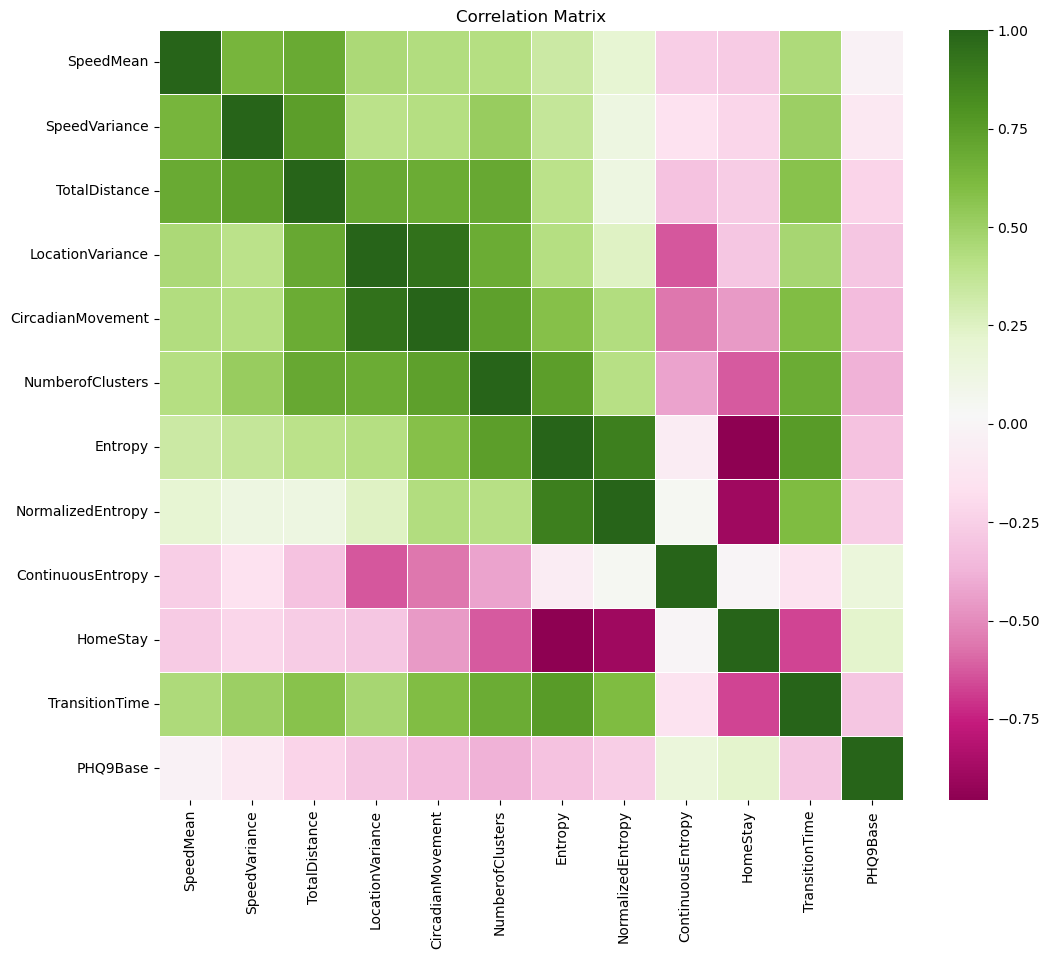

In [9]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

# Machine Learning Models:
These are all basic models - no fine tuning or model specific data pre-processing


In [10]:
#creates classes for classification
#creates 3 classes
dataClassificationThree = merged_df.copy()
columns = ['PHQ9Base']
# columns = ['PHQ9']

for column in columns:
    dataClassificationThree.loc[((dataClassificationThree[column] > 0)& (dataClassificationThree[column]<=5)), column] = 0
    dataClassificationThree.loc[((dataClassificationThree[column] > 5)& (dataClassificationThree[column]<=10)), column] = 1
    dataClassificationThree.loc[((dataClassificationThree[column] > 10)), column] = 2

print(dataClassificationThree)


       SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   2.329154e-05   2.505256e-07     229.987882          5.274546   
1   6.054921e-07   2.877519e-11       2.566260        -11.383360   
2   1.615362e-06   1.920707e-09       6.686956         -6.973576   
3   3.545538e-07   8.135541e-11       0.824013        -11.517559   
4   1.389936e-06   6.292272e-10      27.183983         -3.618104   
5   7.993447e-07   1.376761e-10       5.184300         -4.759810   
6   5.926940e-07   3.656015e-11      26.565523         -1.906466   
7   5.562702e-07   1.972275e-11       4.488032         -7.619410   
8   7.646657e-07   3.040105e-11       9.662998         -4.076226   
9   5.302156e-07   2.703248e-11       2.176755        -12.302372   
10  7.598654e-06   5.797482e-09      51.149978         -0.451367   
11  2.434079e-06   2.907508e-10      11.680799         -7.024697   
12  5.455124e-07   1.866984e-11       5.338019         -2.688427   
13  7.962274e-07   6.297755e-11      13.623527  

In [11]:
#creates classes for classification
#creates 2 classes
dataClassification = merged_df.copy()
columns = ['PHQ9Base']
# columns = ['PHQ9']

for column in columns:
    dataClassification.loc[((dataClassification[column] > 0)& (dataClassification[column]<=5)), column] = 0
    dataClassification.loc[((dataClassification[column] > 5)), column] = 1

print(dataClassification)

       SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   2.329154e-05   2.505256e-07     229.987882          5.274546   
1   6.054921e-07   2.877519e-11       2.566260        -11.383360   
2   1.615362e-06   1.920707e-09       6.686956         -6.973576   
3   3.545538e-07   8.135541e-11       0.824013        -11.517559   
4   1.389936e-06   6.292272e-10      27.183983         -3.618104   
5   7.993447e-07   1.376761e-10       5.184300         -4.759810   
6   5.926940e-07   3.656015e-11      26.565523         -1.906466   
7   5.562702e-07   1.972275e-11       4.488032         -7.619410   
8   7.646657e-07   3.040105e-11       9.662998         -4.076226   
9   5.302156e-07   2.703248e-11       2.176755        -12.302372   
10  7.598654e-06   5.797482e-09      51.149978         -0.451367   
11  2.434079e-06   2.907508e-10      11.680799         -7.024697   
12  5.455124e-07   1.866984e-11       5.338019         -2.688427   
13  7.962274e-07   6.297755e-11      13.623527  

In [12]:
# print(dataClassification['PHQ9'].unique())
print(dataClassification['PHQ9Base'].unique())

[0 1]


In [13]:
X = dataClassification.drop(['PHQ9Base'], axis=1)
# X = dataClassification.drop(['PHQ9'], axis=1)
# y_PHQ9 = dataClassification['PHQ9']
y_PHQ9Base = dataClassification['PHQ9Base']


In [14]:
# Create the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    ''' Plot the confusion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

  
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

    
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cm, annot=True,fmt='.0f',cmap="YlGnBu",annot_kws={"size": 10}) 
    plt.show()

In [15]:
# ROC Curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(121)
    ax.set_aspect(1)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [16]:
#Function to train and evaluate:
def TrainandEval(model, features, target, name):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    print("Train score:", model.score(X_train, y_train))
    print("Validation score:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    #print the classification report to highlight the accuracy with f1-score, precision and recall
    print(metrics.classification_report(y_test, y_pred))
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    plot_roc_curve(y_test, y_pred)


In [17]:
#declare all model vars:
LR = LogisticRegression()
SVM = SVC()
RF = RandomForestClassifier() 
XGB = XGBClassifier()


## Logistic Regression 

Train score: 0.6944444444444444
Validation score: 0.3
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.29      0.50      0.36         4

    accuracy                           0.30        10
   macro avg       0.31      0.33      0.29        10
weighted avg       0.31      0.30      0.28        10

Number of mislabeled points out of a total 10 points : 7
Accuracy: 0.3


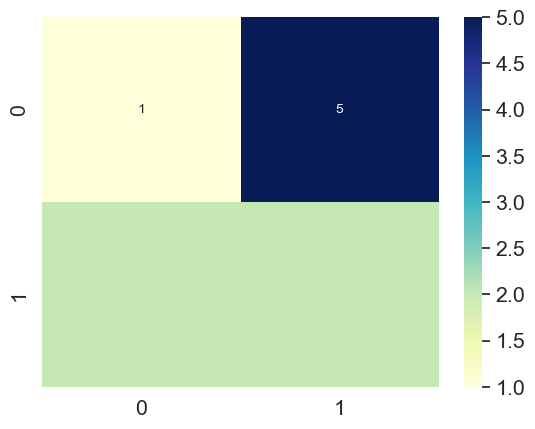

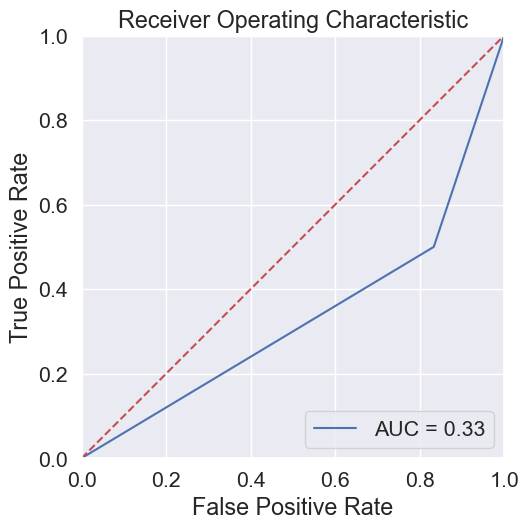

In [18]:
TrainandEval(LR, X, y_PHQ9Base, 'log Reg')

## Support Vector Machine (SVM)

Train score: 0.6388888888888888
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

Number of mislabeled points out of a total 10 points : 4
Accuracy: 0.6


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

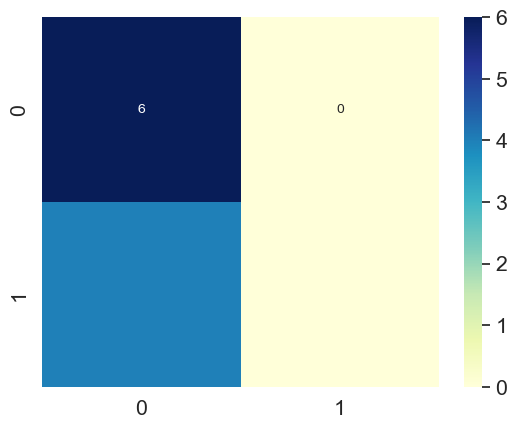

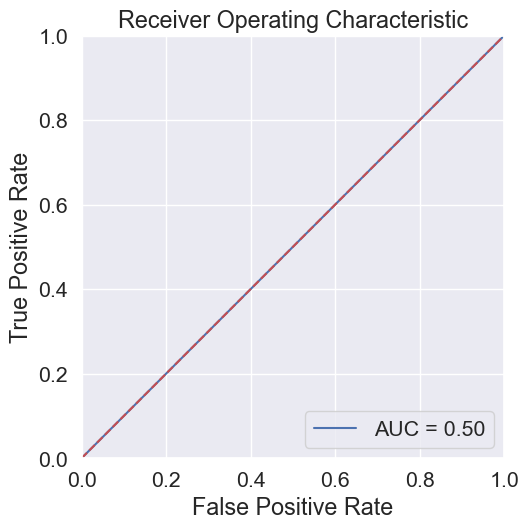

In [19]:
TrainandEval(SVM, X, y_PHQ9Base, 'log Reg')

## Random Forest 

Train score: 1.0
Validation score: 0.3
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.20      0.25      0.22         4

    accuracy                           0.30        10
   macro avg       0.30      0.29      0.29        10
weighted avg       0.32      0.30      0.31        10

Number of mislabeled points out of a total 10 points : 7
Accuracy: 0.3


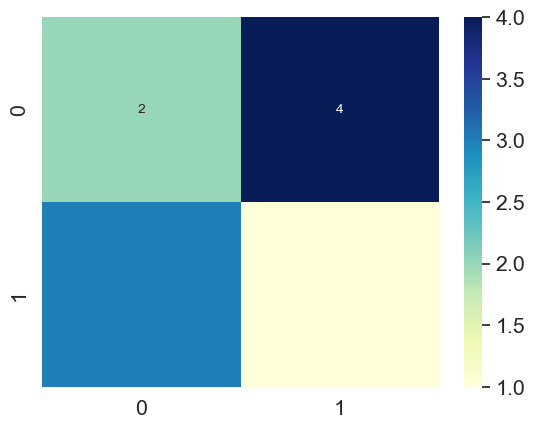

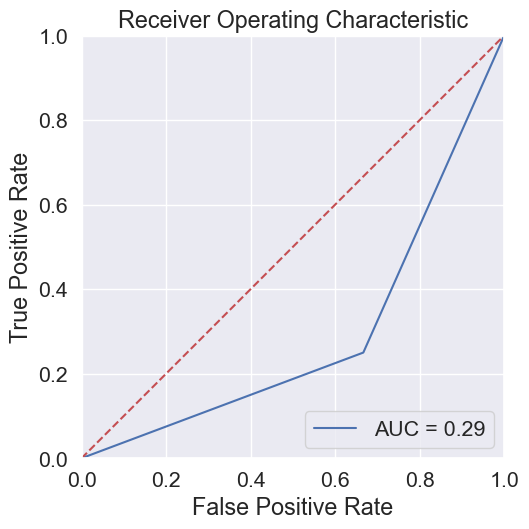

In [20]:
TrainandEval(RF, X, y_PHQ9Base, 'log Reg')

## XGBoost

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

Number of mislabeled points out of a total 10 points : 4
Accuracy: 0.6


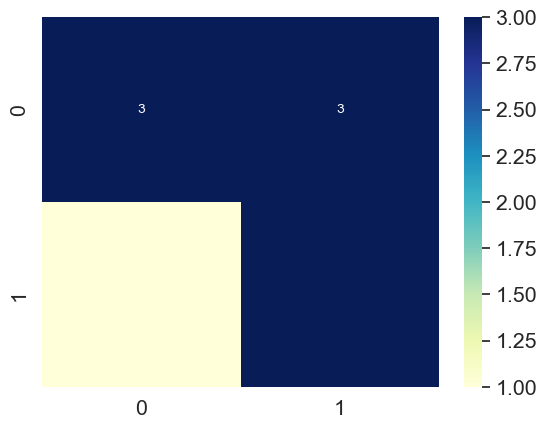

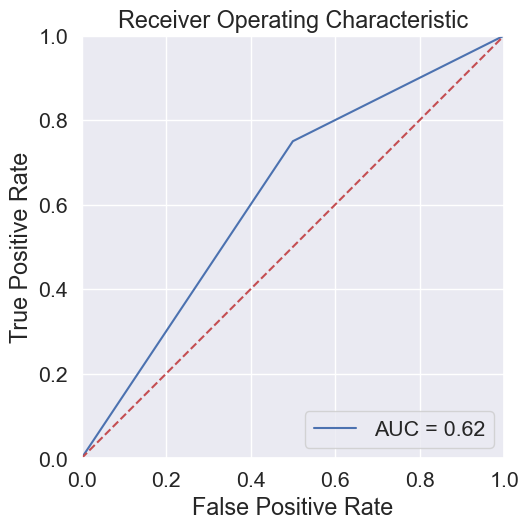

In [21]:
TrainandEval(XGB, X, y_PHQ9Base, 'log Reg')

# Improved ML Models

In [22]:
# Initialize the StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## SVM

Train score: 0.6666666666666666
Validation score: 0.2
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.17      0.25      0.20         4

    accuracy                           0.20        10
   macro avg       0.21      0.21      0.20        10
weighted avg       0.22      0.20      0.20        10

Number of mislabeled points out of a total 10 points : 8
Accuracy: 0.2


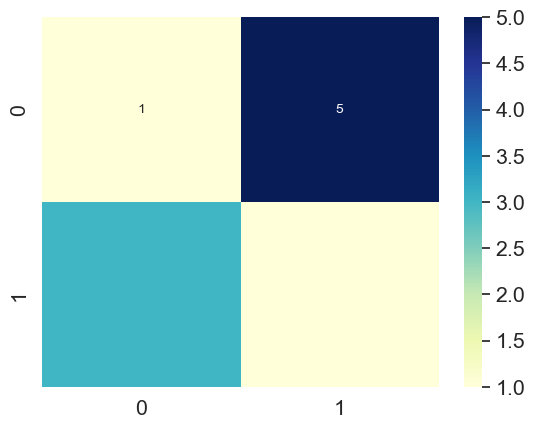

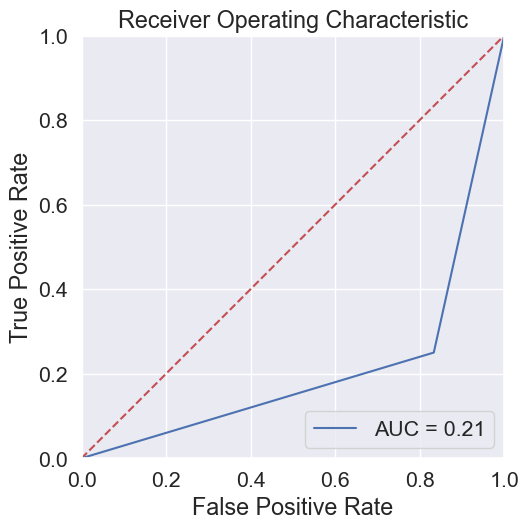

In [23]:
TrainandEval(SVM, X_scaled, y_PHQ9Base, 'log Reg')

## LR

Train score: 0.7222222222222222
Validation score: 0.3
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.29      0.50      0.36         4

    accuracy                           0.30        10
   macro avg       0.31      0.33      0.29        10
weighted avg       0.31      0.30      0.28        10

Number of mislabeled points out of a total 10 points : 7
Accuracy: 0.3


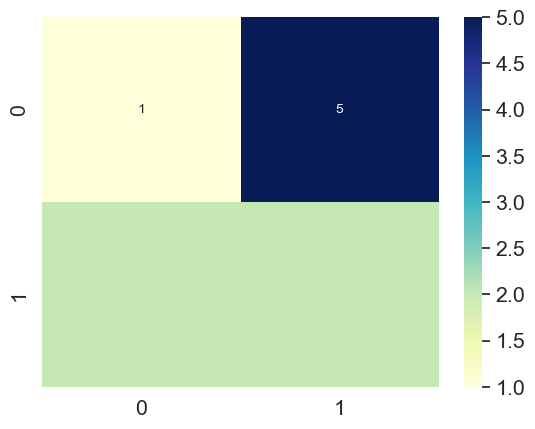

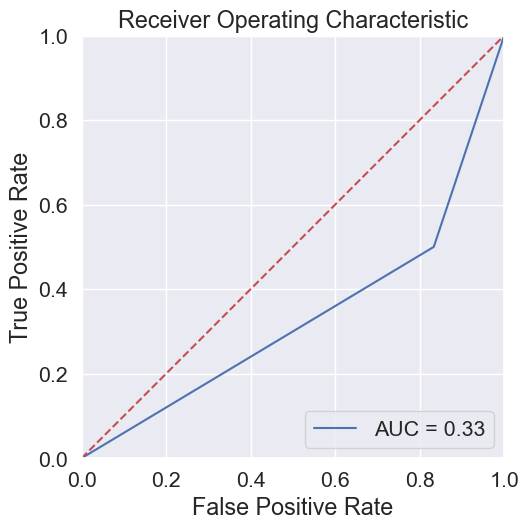

In [24]:
TrainandEval(LR, X_scaled, y_PHQ9Base, 'log Reg')